## Bhuvnesh Sahu 
- MDS202316

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
df = pd.read_csv("SMSSpamCollection", sep='\t', names=["target", "text"])

In [4]:
df.sample(5)

,target,text
4429,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
5523,ham,Going to join tomorrow.
718,ham,Book which lesson? then you msg me... I will c...
1587,ham,There are no other charges after transfer char...
558,ham,I know that my friend already told that.


In [5]:
df.shape

(5572, 2)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

## 2.EDA

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

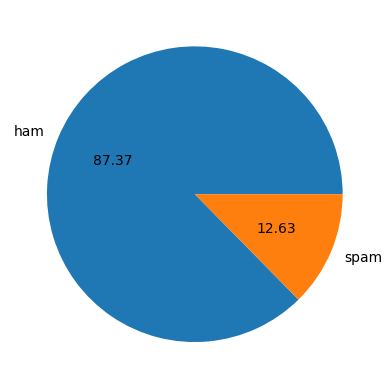

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Data is imbalanced

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhuvnesh's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,79.344554,18.593538
std,58.437457,13.402779
min,2.000000,1.000000
25%,36.000000,9.000000
50%,61.000000,15.000000
75%,119.000000,26.000000
max,910.000000,220.000000


In [21]:
# ham
df[df['target'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.905890,17.267715
std,56.715046,13.588065
min,2.000000,1.000000
25%,34.000000,8.000000
50%,53.000000,13.000000
75%,91.000000,22.000000
max,910.000000,220.000000


In [22]:
#spam
df[df['target'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.704441,27.762634
std,29.821348,6.993008
min,13.000000,2.000000
25%,132.000000,25.000000
50%,148.000000,29.000000
75%,157.000000,32.000000
max,223.000000,46.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

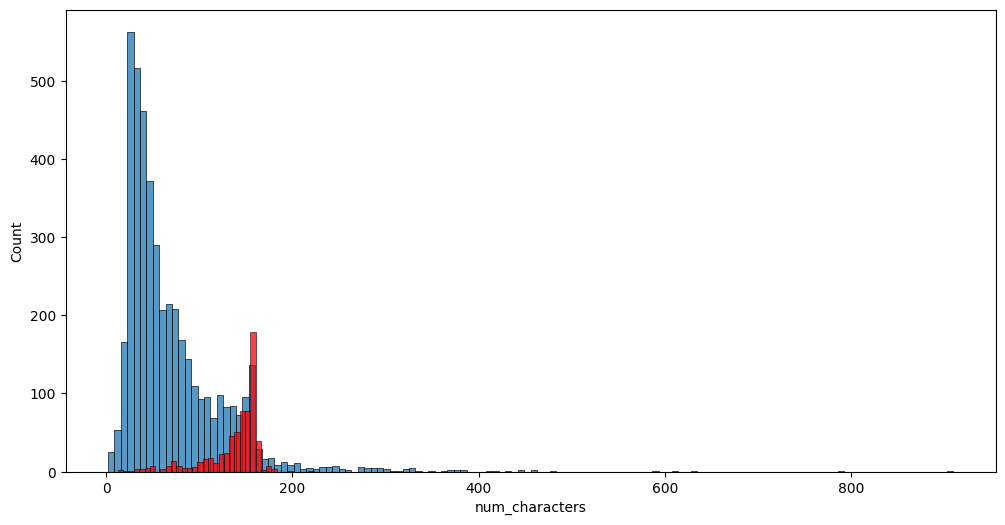

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

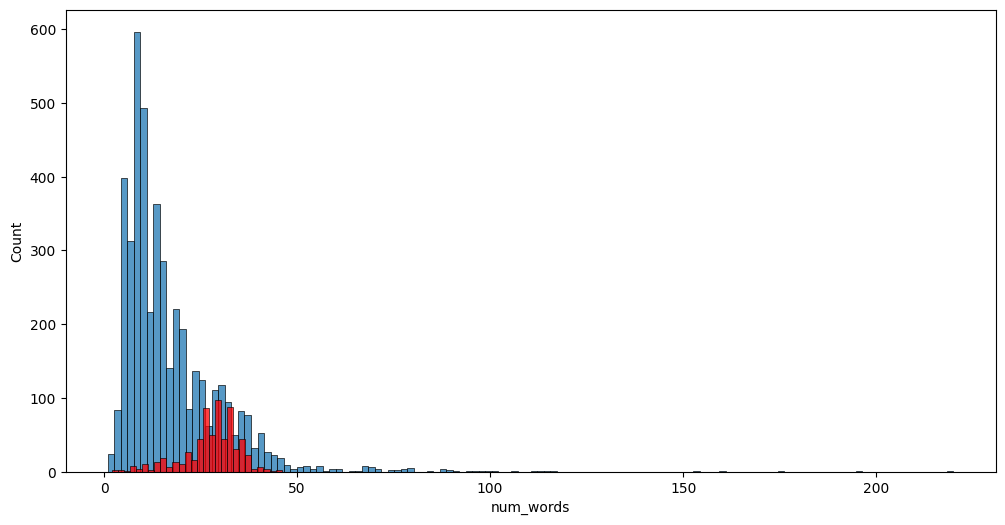

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

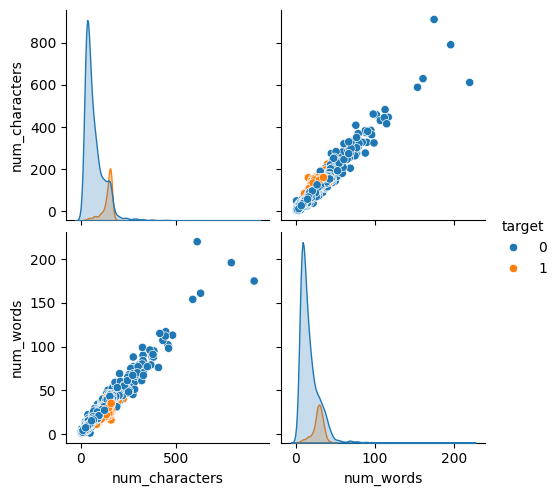

In [26]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Stemming

In [27]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [28]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

In [30]:
df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah i do think he goe to usf he live around he...


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

## WordCloud for Spam

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

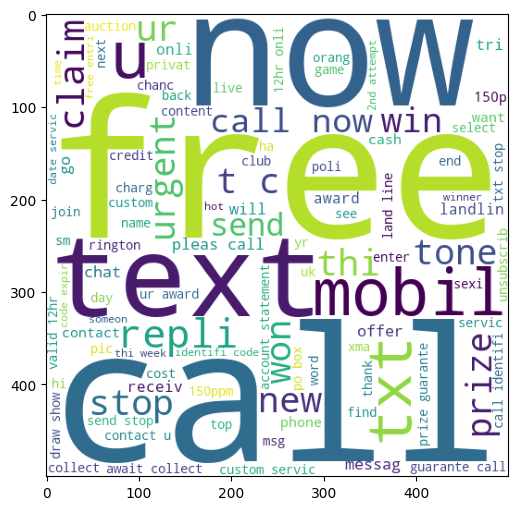

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

## WordCloud for Ham

In [34]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

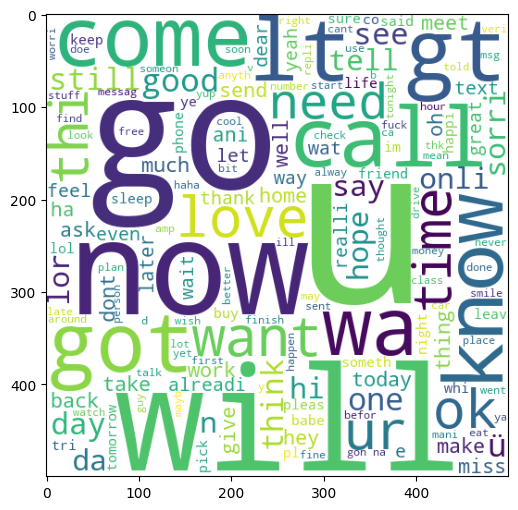

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [36]:
df1=df.drop(['text'],axis=1)

In [37]:
df1['text'] = df1['transformed_text']
df1=df1.drop(['transformed_text'],axis=1)

In [38]:
df1

,target,num_characters,num_words,text
0,0,111,24,go until jurong point crazi avail onli in bugi...
1,0,29,8,ok lar joke wif u oni
2,1,155,37,free entri in 2 a wkli comp to win fa cup fina...
3,0,49,13,u dun say so earli hor u c alreadi then say
4,0,61,15,nah i do think he goe to usf he live around he...
...,...,...,...,...
5164,1,160,35,thi is the 2nd time we have tri 2 contact u ha...
5165,0,36,9,will ü b go to esplanad fr home
5166,0,57,15,piti wa in mood for that so ani other suggest
5167,0,125,27,the guy did some bitch but i act like i be int...


In [41]:
!pip install dvc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/609.1 kB ? eta -:--:--
   --------------------------------------- 609.1/609.1 kB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 13.4 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144578 sha256=366e2bc4cf71db8f30c7a4eef942f9739aff90f94fcd03653d7c28b94d5cc407
  Stored in directory: c:\users\bhuvnesh's pc\appdata\local\pip\cache\wheels\1a\97\32\461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built antlr4-python3-runtime
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


  You can safely remove it manually.


In [73]:
# Initialize Git repository
!git init

# Initialize DVC
!dvc init

Initialized empty Git repository in C:/Users/Bhuvnesh's PC/PycharmProjects/pythonProject/AML/Assignment 2/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [74]:
raw_data=df1
raw_data.to_csv('raw_data.csv')

In [75]:
!dvc add raw_data.csv


To track the changes with git, run:

	git add raw_data.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [90]:
def split_data(df,seed):
    """Split the data into train, validation, and test sets."""
    train, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validation = train_test_split(train, test_size=0.1, random_state=seed)
    return train, validation, test

def save_data_splits(train, validation, test):
    """Save the train, validation, and test splits into CSV files."""
    train.to_csv('train.csv', index=False)
    validation.to_csv('validation.csv', index=False)
    test.to_csv('test.csv', index=False)

In [77]:
train, validation, test = split_data(df1,42)
save_data_splits(train, validation, test)

In [78]:
# Add train, validation, and test data splits
!dvc add train.csv validation.csv test.csv


To track the changes with git, run:

	git add .gitignore train.csv.dvc test.csv.dvc validation.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [79]:
!git add *.dvc .gitignore

# Commit changes
!git commit -m "Initial train/validation/test split"

[master (root-commit) 0b74515] Initial train/validation/test split
 8 files changed, 30 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
 create mode 100644 .gitignore
 create mode 100644 raw_data.csv.dvc
 create mode 100644 test.csv.dvc
 create mode 100644 train.csv.dvc
 create mode 100644 validation.csv.dvc


In [91]:
train, validation, test = split_data(df1, seed=16)
save_data_splits(train, validation, test)

In [81]:
!dvc add train.csv validation.csv test.csv



To track the changes with git, run:

	git add train.csv.dvc validation.csv.dvc test.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [82]:
# Commit updated split
!git add *.dvc
!git commit -m "Updated data split with new random seed"

[master 226898d] Updated data split with new random seed
 3 files changed, 6 insertions(+), 6 deletions(-)


In [83]:
!git checkout HEAD~1  
!dvc checkout

Note: switching to 'HEAD~1'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 0b74515 Initial train/validation/test split


M       validation.csv
M       test.csv
M       train.csv


In [84]:
for split in ['train', 'validation', 'test']:
    df = pd.read_csv(f'{split}.csv')
    print(f'Distribution in {split}.csv:')
    print(df['target'].value_counts(), '\n')

Distribution in train.csv:
target
0    3251
1     470
Name: count, dtype: int64 

Distribution in validation.csv:
target
0    362
1     52
Name: count, dtype: int64 

Distribution in test.csv:
target
0    903
1    131
Name: count, dtype: int64 



In [86]:
!git checkout master
!dvc checkout

Previous HEAD position was 0b74515 Initial train/validation/test split
Switched to branch 'master'


M       train.csv
M       test.csv
M       validation.csv


In [93]:
for split in ['train', 'validation', 'test']:
    df = pd.read_csv(f'{split}.csv')
    print(f'Distribution in {split}.csv:')
    print(df['target'].value_counts(), '\n')

Distribution in train.csv:
target
0    3262
1     459
Name: count, dtype: int64 

Distribution in validation.csv:
target
0    364
1     50
Name: count, dtype: int64 

Distribution in test.csv:
target
0    890
1    144
Name: count, dtype: int64 

